<a href="https://colab.research.google.com/github/WrightlyRong/ASL-Recognition-with-Augmented-ASL-Alphabet-Dataset/blob/master/ASL_Recognition_with_Augmented_ASL_Alphabet_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import string
pd.options.mode.chained_assignment = None

import requests

In [ ]:
#Connect Google Drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
data = pd.read_csv("/gdrive/MyDrive/asl_tnn_train_64by64.csv")

In [ ]:
data.head()

,label,2,3,4,5,6,7,8,9,10,...,4088,4089,4090,4091,4092,4093,4094,4095,4096,4097
0,0,38,52,48,45,46,47,47,46,45,...,119,119,119,119,119,119,119,119,124,95
1,0,38,51,49,47,47,48,47,48,48,...,123,123,121,120,119,120,121,121,127,97
2,0,39,52,48,47,47,47,48,48,46,...,120,120,120,120,120,119,120,119,126,96
3,0,39,52,48,47,47,49,48,48,47,...,122,122,121,120,120,121,122,121,127,98
4,0,39,53,48,47,47,48,48,48,47,...,121,121,120,119,120,120,120,120,125,97


In [ ]:
Y = np.array(data['label'])
X = np.array(data.drop(columns='label'))

print(X.shape, Y.shape)

(86268, 4096) (86268,)


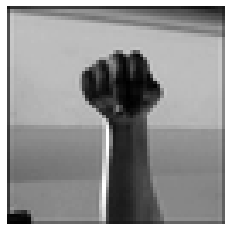

13


In [ ]:
import matplotlib.pyplot as plt
import random
r = random.randint(0,(86268-1))
def show_img():
  arr = np.array(X)
  some_value = arr[r]
  some_img = some_value.reshape(64,64)
  plt.imshow(some_img, cmap="gray")
  plt.axis("off")
  plt.show()  

show_img()
print(Y[r])

In [ ]:
dummy_y = np.zeros( (86268, 26) )
print(dummy_y.shape)

for i in range(len(Y)):
  dummy_y[i][Y[i]-1]=1

(86268, 26)


In [ ]:
X_2 = pd.DataFrame(X).values.reshape(X.shape[0] ,64, 64, 1)
print(X_2.shape)

(86268, 64, 64, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_rem, Y_train, y_rem = train_test_split(X_2,dummy_y, train_size=0.6)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape), print(Y_train.shape)
print(X_valid.shape), print(Y_valid.shape)
print(X_test.shape), print(Y_test.shape)

(51760, 64, 64, 1)
(51760, 26)
(17254, 64, 64, 1)
(17254, 26)
(17254, 64, 64, 1)
(17254, 26)


(None, None)

In [ ]:
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.
X_valid = X_valid.astype('float32')
X_valid = X_valid / 255.
print(X_valid[0])

[[[0.7019608 ]
  [0.7176471 ]
  [0.7176471 ]
  ...
  [0.5921569 ]
  [0.58431375]
  [0.5764706 ]]

 [[0.70980394]
  [0.7176471 ]
  [0.72156864]
  ...
  [0.5921569 ]
  [0.58431375]
  [0.58431375]]

 [[0.7137255 ]
  [0.7176471 ]
  [0.7294118 ]
  ...
  [0.5921569 ]
  [0.58431375]
  [0.58431375]]

 ...

 [[0.6784314 ]
  [0.6901961 ]
  [0.69411767]
  ...
  [0.5647059 ]
  [0.5411765 ]
  [0.5254902 ]]

 [[0.6862745 ]
  [0.69411767]
  [0.69411767]
  ...
  [0.54901963]
  [0.53333336]
  [0.5137255 ]]

 [[0.6862745 ]
  [0.6901961 ]
  [0.69411767]
  ...
  [0.54901963]
  [0.5176471 ]
  [0.5058824 ]]]


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses, optimizers
from tensorflow.keras.utils import to_categorical

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.30))
model.add(layers.Dense(26, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

In [ ]:
batch_size = 256
epochs = 25
num_classes = 26

In [ ]:
model.compile(loss=losses.categorical_crossentropy, optimizer=optimizers.Adam(),metrics=['accuracy'])

In [ ]:
training_history = model.fit(X_train, Y_train,
                             batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(X_valid, Y_valid))

Epoch 1/25
203/203 [==============================] - 317s 2s/step - loss: 2.8715 - accuracy: 0.1451 - val_loss: 1.9944 - val_accuracy: 0.4107
Epoch 2/25
203/203 [==============================] - 316s 2s/step - loss: 1.8289 - accuracy: 0.4102 - val_loss: 1.1765 - val_accuracy: 0.6512
Epoch 3/25
203/203 [==============================] - 315s 2s/step - loss: 1.3413 - accuracy: 0.5503 - val_loss: 0.8534 - val_accuracy: 0.7328
Epoch 4/25
203/203 [==============================] - 315s 2s/step - loss: 1.0827 - accuracy: 0.6253 - val_loss: 0.6311 - val_accuracy: 0.8083
Epoch 5/25
203/203 [==============================] - 316s 2s/step - loss: 0.8989 - accuracy: 0.6863 - val_loss: 0.5089 - val_accuracy: 0.8455
Epoch 6/25
203/203 [==============================] - 322s 2s/step - loss: 0.7904 - accuracy: 0.7223 - val_loss: 0.4062 - val_accuracy: 0.8817
Epoch 7/25
203/203 [==============================] - 319s 2s/step - loss: 0.6973 - accuracy: 0.7520 - val_loss: 0.3102 - val_accuracy: 0.9135

In [ ]:
test_eval = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.05838055536150932
Test accuracy: 0.9848730564117432


In [ ]:
predicted_classes = model.predict(X_test)

In [ ]:
print(predicted_classes[0])
print(np.argmax(np.round(predicted_classes[0])))

[4.20157352e-23 1.11781651e-09 1.20887616e-20 1.24746749e-11
 9.16467522e-20 2.92639687e-24 0.00000000e+00 1.51732195e-22
 8.89638990e-24 9.42662276e-23 2.60173771e-10 6.68681366e-07
 1.37294397e-12 4.97185804e-09 3.23153211e-27 3.94667771e-10
 7.89880986e-29 5.00726571e-07 9.29388261e-05 1.04091462e-16
 2.37973294e-17 7.27140355e-20 1.56747006e-08 2.11506168e-09
 9.99904871e-01 1.00318755e-06]
24


In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape

(17254,)

In [ ]:
predicted_classes

array([ 6,  5, 18, ...,  8,  6,  1])

In [ ]:
Y_test2 = np.argmax(np.round(Y_test),axis=1)
Y_test2

array([ 6,  5, 18, ...,  8,  6,  1])

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 5.1 MB/s 
     |████████████████████████████████| 212 kB 40.1 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 1.1 MB 43.2 MB/s 
     |████████████████████████████████| 84 kB 2.9 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 253 kB 55.9 MB/s 
     |████████████████████████████████| 2.0 MB 42.5 MB/s 
     |████████████████████████████████| 144 kB 51.5 MB/s 
     |████████████████████████████████| 271 kB 57.3 MB/s 
     |████████████████████████████████| 94 kB 3.6 MB/s 
     |████████████████████████████████| 11.1 MB 39.6 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 80 kB 9.2 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
     |████████████████████████████████| 62 kB

In [ ]:
import gradio as gr

In [ ]:
labels = ("A", "B", "C", "D", "E",
          "F", "G", "H", "I", "J", "K",
          "L", "M", "N", "O", "P",
          "Q", "R", "S", "T", "U",
          "V", "W", "X", "Y", "Z")

In [ ]:
labels_2 = ("0", "1", "2", "3", "4",
          "5", "6", "7", "8", "9", "10",
          "11", "12", "13", "14", "15",
          "16", "17", "18", "19", "20",
          "21", "22", "23", "24", "25")

Misclassified labels - 431


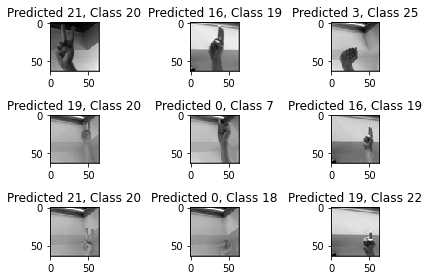

In [ ]:
correct = np.where(predicted_classes==Y_test2)[0]
print(f'Misclassified labels - {(Y_test2.shape[0]) - len(correct)}')
cnt = 0
for i in range (0,len(Y_test2)):
  if(predicted_classes[i]!=Y_test2[i]):
    
    plt.subplot(3,3,cnt+1)
    plt.imshow(X_test[i].reshape(64,64), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[i], Y_test2[i]))
    plt.tight_layout()
    cnt+=1
    if(cnt==9):
      break

correct labels - 16823


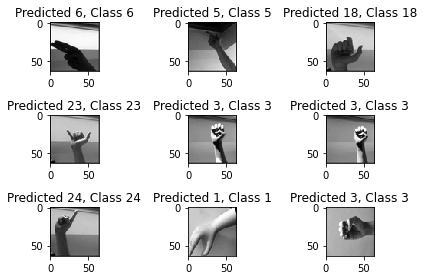

In [ ]:
correct = np.where(predicted_classes==Y_test2)[0]
print(f'correct labels - {len(correct)}')
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(64,64), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], Y_test2[correct]))
    plt.tight_layout()

In [ ]:
from PIL import Image

In [ ]:
!gdown --id 1QwuBDmPWqLKrBn8cikNFYHmta-11vxIi
!gdown --id 1tU9gHoYJZqRCQA6uoQHosy4iOyyyXxUx
!gdown --id 1XX1wg1vjnCeWuxJkVBoKELaqGQJxJnH-
!gdown --id 10YM8Qm9XsR9os7aFPK2LGAOkPu26DTrs

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1QwuBDmPWqLKrBn8cikNFYHmta-11vxIi
To: /content/MLimageA.jpg
100% 146k/146k [00:00<00:00, 48.4MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1tU9gHoYJZqRCQA6uoQHosy4iOyyyXxUx
To: /content/MLimageV.jpg
100% 2.99k/2.99k [00:00<00:00, 3.65MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: htt

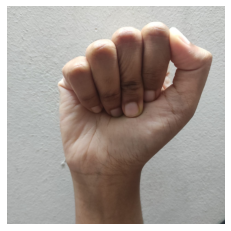

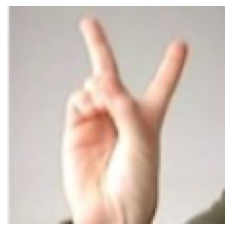

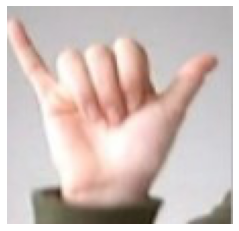

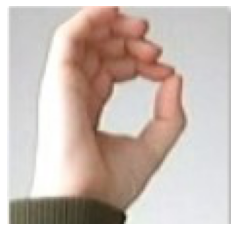

In [ ]:
img = Image.open("MLimageA.jpg")
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

img2 = Image.open("MLimageV.jpg")
plt.imshow(img2, cmap="gray")
plt.axis("off")
plt.show()

img3 = Image.open("MLimageY.jpg")
plt.imshow(img3, cmap="gray")
plt.axis("off")
plt.show()

img4 = Image.open("MLimageO.jpg")
plt.imshow(img4, cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
im_resized = img3.resize((64,64), Image.ANTIALIAS)

In [ ]:
dummy_img = np.array(im_resized)
dummy_img = dummy_img.reshape(-1,64,64,1)
predict_dummy_image = model.predict(dummy_img)
print(np.argmax(np.round(predict_dummy_image)))

3


In [ ]:
KERAS_MODEL_NAME = "asl_augmented_64by64_iter25_model.h5"

In [ ]:
model.save(KERAS_MODEL_NAME)

In [ ]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_asl_augmented_64_iter25_model.tflite"

In [ ]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpnjpwx9ea/assets


In [ ]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

2592736

In [ ]:
new_model = tf.keras.models.load_model('asl_augmented_64by64_iter25_model.h5')

In [ ]:
predicted_classes_new = new_model.predict(X_test)
predicted_classes_new = np.argmax(np.round(predicted_classes_new),axis=1)

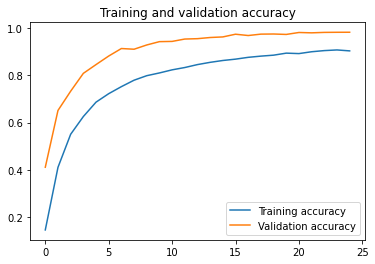

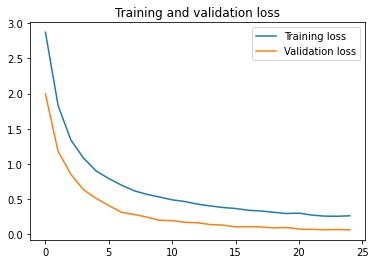

In [ ]:
accuracy = training_history.history['accuracy']
val_accuracy = training_history.history['val_accuracy']
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']
epoch = range(len(accuracy))
plt.plot(epoch, accuracy, label='Training accuracy')
plt.plot(epoch, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epoch, loss, label='Training loss')
plt.plot(epoch, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(predicted_classes_new, Y_test2)  
cf

array([[655,   4,   0,  10,   1,   2,   0,   3,   0,   3,   1,   2,  15,
          4,   0,   1,   2,  12,  14,   7,  27,  23,   4,  10,   5,  12],
       [  0, 655,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          3,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1, 630,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  4,   0,   0, 643,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5],
       [  1,   0,   0,   0, 696,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1,   0,   0,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 660,   2,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   7, 710,   0,   1,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   

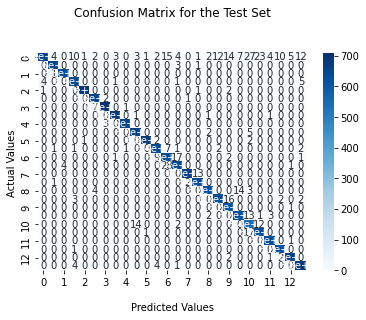

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix for the Test Set\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


ax.xaxis.set_ticklabels(['0','1','2','3','4','5',
                         '6','7','8','9','10','11',
                         '12','13','14','15','16','17',
                         '18','19','20','21','22','23',
                         '24','25'])
ax.yaxis.set_ticklabels(['0','1','2','3','4','5',
                         '6','7','8','9','10','11',
                         '12','13','14','15','16','17',
                         '18','19','20','21','22','23',
                         '24','25'])


plt.show()

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['0','1','2','3','4','5',
                         '6','7','8','9','10','11',
                         '12','13','14','15','16','17',
                         '18','19','20','21','22','23',
                         '24','25']

Confusion matrix, without normalization
[[655   4   0  10   1   2   0   3   0   3   1   2  15   4   0   1   2  12
   14   7  27  23   4  10   5  12]
 [  0 655   0   0   0   0   0   0   0   0   0   0   0   3   0   1   0   0
    0   0   0   0   0   0   0   0]
 [  0   1 630   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  4   0   0 643   0   0   0   1   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   0   0   5]
 [  1   0   0   0 696   0   0   0   0   0   0   0   0   0   0   1   0   0
    2   0   0   0   0   0   0   0]
 [  0   0   0   0   0 660   2   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   7 710   0   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 683   0   1   0   0   0   0   0   0   1   0
    0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   3   0 655   0   0   0   0   0   0   0   0   0
    0   0   0 

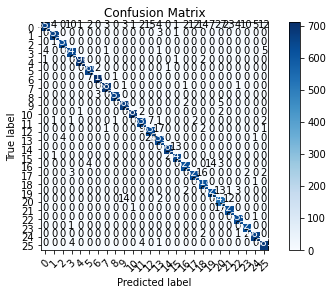

In [ ]:
plot_confusion_matrix(cm=cf, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
from PIL import Image

In [ ]:
def classify_image(inp):
    inp = Image.fromarray(inp)
    inp = inp.convert('L')
    inp = inp.resize((64,64), Image.ANTIALIAS)
    inp = np.array(inp)
    inp = inp.reshape(-1, 64, 64, 1)
    #inp = tf.keras.applications.mobilenet_v2.preprocess_input(inp)
    inp = inp.astype('float32')
    inp = inp / 255.
    classes = new_model.predict(inp)
    #return np.argmax(np.round(classes))
    #return(inp.shape)
    predicted_character = np.argmax(np.round(classes))
    predicted_character_idx = (predicted_character+1)%26
    return labels[predicted_character_idx]
   # prediction = model.predict(inp).flatten()
    #return {labels_2[i]: float(prediction[i]) for i in range(1000)}

In [ ]:
iface = gr.Interface(fn=classify_image, inputs = "image", outputs = "text", capture_session=True)
iface.launch(debug=True)

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `capture_session` parameter is deprecated, and it has no effect
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://15787.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7fcbac3362d0>,
 'http://127.0.0.1:7860/',
 'https://15787.gradio.app')